In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df =  pd.read_csv("card_transaction.v1.csv")

In [4]:
df.columns 


Index(['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount', 'Use Chip',
       'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC',
       'Errors?', 'Is Fraud?'],
      dtype='object')

In [5]:
df.shape

(24386900, 15)

In [6]:
df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


### Plotting fraud percentage per year

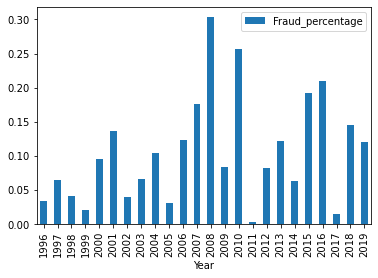

In [7]:
df_fraud=df[['User','Year','Is Fraud?']].groupby(['Year','Is Fraud?']).count().reset_index()
df_fraud_dict=df_fraud.groupby('Year')['User'].sum().to_dict()
df_fraud['Total']=df_fraud['Year'].map(df_fraud_dict)
df_fraud['Fraud_percentage']=(df_fraud["User"]/df_fraud['Total'])*100
df_fraud[['Year','Is Fraud?','Fraud_percentage']]
df_fraud=df_fraud.rename(columns={'Is Fraud?':"Fraud"})
df_fraud=df_fraud[df_fraud["Fraud"]!="No"]
df_fraud.plot(x="Year",y=['Fraud','Fraud_percentage'],kind="bar")

# Save the plot
plt.savefig('fraud_analysis_plot.png')

# Show the plot
plt.show()

### Selecting only transactions from 2008

In [30]:
df=df[(df['Year']==2008)]
df

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
1899,0,0,2008,1,1,06:34,$90.39,Swipe Transaction,4060646732831064559,La Verne,CA,91750.0,5411,NaN,No
1900,0,0,2008,1,1,13:06,$66.00,Swipe Transaction,2027553650310142703,Mira Loma,CA,91752.0,5541,NaN,No
1901,0,0,2008,1,1,13:14,$-66.00,Swipe Transaction,2027553650310142703,Mira Loma,CA,91752.0,5541,NaN,No
1902,0,0,2008,1,1,13:15,$43.06,Swipe Transaction,2027553650310142703,Mira Loma,CA,91752.0,5541,NaN,No
1903,0,0,2008,1,1,13:19,$10.22,Swipe Transaction,-5023497618971072366,Mira Loma,CA,91752.0,5812,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24366362,1997,1,2008,12,29,05:45,$2.51,Swipe Transaction,-4531641834336874998,Elizabeth,NJ,7201.0,5411,NaN,No
24366363,1997,1,2008,12,29,06:08,$41.01,Swipe Transaction,-2674390926778027106,Elizabeth,NJ,7201.0,5211,NaN,No
24366364,1997,1,2008,12,29,11:17,$3.18,Swipe Transaction,4722913068560264812,Elizabeth,NJ,7202.0,5411,NaN,No
24366365,1997,1,2008,12,30,11:03,$2.83,Swipe Transaction,-7614744303815948174,Elizabeth,NJ,7201.0,5812,NaN,No


In [35]:
df['Errors?'].unique()

array([nan, 'Insufficient Balance,', 'Bad PIN,', 'Bad Card Number,',
       'Technical Glitch,', 'Bad Expiration,', 'Bad CVV,',
       'Bad Expiration,Bad CVV,', 'Bad Zipcode,',
       'Bad Card Number,Insufficient Balance,',
       'Insufficient Balance,Technical Glitch,',
       'Bad PIN,Insufficient Balance,', 'Bad Card Number,Bad CVV,',
       'Bad PIN,Technical Glitch,', 'Bad CVV,Insufficient Balance,',
       'Bad Expiration,Technical Glitch,',
       'Bad Card Number,Technical Glitch,',
       'Bad Zipcode,Insufficient Balance,',
       'Bad Expiration,Insufficient Balance,',
       'Bad Zipcode,Technical Glitch,'], dtype=object)

In [37]:
df.count()

User              1223460
Card              1223460
Year              1223460
Month             1223460
Day               1223460
Time              1223460
Amount            1223460
Use Chip          1223460
Merchant Name     1223460
Merchant City     1223460
Merchant State    1096068
Zip               1088543
MCC               1223460
Errors?             19438
Is Fraud?         1223460
dtype: int64

In [9]:
### Selecting only transactions from month 5 and 8 from transactions from year 2008

In [38]:

transactions_month_5_and_8 = df[df['Month'].isin([5, 8])]


In [54]:
transactions_month_5_and_8.count()

User              209049
Card              209049
Year              209049
Month             209049
Day               209049
Time              209049
Amount            209049
Use Chip          209049
Merchant Name     209049
Merchant City     209049
Merchant State    187315
Zip               185894
MCC               209049
Errors?             3324
Is Fraud?         209049
dtype: int64

In [56]:
value_counts = transactions_month_5_and_8['Is Fraud?'].value_counts()
proportions = value_counts / len(transactions_month_5_and_8)
pd.DataFrame({
    'Count': value_counts,
    'Proportion': proportions
})

,Count,Proportion
Is Fraud?,,
No,208362,0.996714
Yes,687,0.003286


In [57]:
transactions_month_5_and_8.head(50)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
2003,0,0,2008,5,2,13:28,$9.80,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2004,0,0,2008,5,3,13:46,$36.17,Online Transaction,7035602569409149834,ONLINE,NaN,NaN,5311,NaN,No
2005,0,0,2008,5,4,13:17,$11.99,Swipe Transaction,-5023497618971072366,Mira Loma,CA,91752.0,5812,NaN,No
2006,0,0,2008,5,5,06:25,$123.79,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2007,0,0,2008,5,7,13:32,$77.62,Swipe Transaction,1913477460590765860,La Verne,CA,91750.0,5300,NaN,No
2008,0,0,2008,5,8,06:32,$35.88,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No
2009,0,0,2008,5,8,13:47,$71.67,Swipe Transaction,3189517333335617109,La Verne,CA,91750.0,5311,NaN,No
2010,0,0,2008,5,11,06:19,$121.09,Swipe Transaction,1913477460590765860,La Verne,CA,91750.0,5300,NaN,No
2011,0,0,2008,5,11,13:50,$52.35,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2012,0,0,2008,5,12,11:49,$25.38,Swipe Transaction,-4752064311331295725,La Verne,CA,91750.0,4214,NaN,No


In [59]:
transactions_month_5_and_8['User'].unique()

array([   0,    1,    2, ..., 1995, 1996, 1997])

### Creating "trans_date_trans_time" feature

In [60]:
def data_time(Year,Month,Day,Time):
  return pd.to_datetime(str(Year)+'-'+str(Month)+'-'+str(Day)+' '+Time)
    
transactions_month_5_and_8['trans_date_trans_time'] =transactions_month_5_and_8[['Year','Month','Day','Time']].apply(lambda z: data_time(*z), axis=1)

<ipython-input-60-37d067a4ce97>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_month_5_and_8['trans_date_trans_time'] =transactions_month_5_and_8[['Year','Month','Day','Time']].apply(lambda z: data_time(*z), axis=1)


In [46]:
transactions_month_5_and_8.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,trans_date_trans_time
2064,0,0,2008,8,6,06:25,$118.74,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,2008-08-06 06:25:00
2065,0,0,2008,8,7,14:21,$61.24,Swipe Transaction,-3220758452254689706,Spring Valley,CA,91978.0,5311,NaN,No,2008-08-07 14:21:00
2066,0,0,2008,8,8,06:03,$108.08,Swipe Transaction,-34551508091458520,La Verne,CA,91750.0,5912,NaN,No,2008-08-08 06:03:00
2067,0,0,2008,8,10,06:24,$69.31,Swipe Transaction,-245178307025547046,La Verne,CA,91750.0,5311,NaN,No,2008-08-10 06:24:00
2068,0,0,2008,8,12,06:18,$133.99,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No,2008-08-12 06:18:00


### Decoding the MCC feature

In [61]:
transactions_month_5_and_8['trans_hour'] = transactions_month_5_and_8['trans_date_trans_time'].dt.hour
transactions_month_5_and_8['day_of_week'] = transactions_month_5_and_8['trans_date_trans_time'].dt.day_name()

def to_catogory(z):
  if 1 <=z<= 1499:
    return 'Agricultural Services'
  if 1500 <=z<= 2999:
    return 'Contracted Services'
  if 3000 <=z<= 3299:
    return '(T&E) Airlines'
  if 3300 <=z<= 3499:
    return '(T&E) Car Rental'
  if 3500 <=z<= 3999:
    return '(T&E) Lodging'
  if 4000 <=z<= 4799:
    return 'Transportation Services'
  if 4800 <=z<= 4999:
    return 'Utility Services'
  if 5000 <=z<= 5599:
    return 'Retail Outlet Services'
  if 5600 <=z<= 5699:
    return 'Clothing Stores'
  if 5700 <=z<= 7299:
    return 'Miscellaneous Stores'
  if 7300 <=z<= 7999:
    return 'Business Services'
  if 8000 <=z<= 8999:
    return 'Professional Services and Membership Organizations'
  if 9000 <=z<= 9999:
    return 'Government Services'


<ipython-input-61-65cd6cc8dfdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_month_5_and_8['trans_hour'] = transactions_month_5_and_8['trans_date_trans_time'].dt.hour
<ipython-input-61-65cd6cc8dfdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_month_5_and_8['day_of_week'] = transactions_month_5_and_8['trans_date_trans_time'].dt.day_name()


In [62]:
transactions_month_5_and_8['category']=transactions_month_5_and_8[['MCC']].apply(lambda z:to_catogory(*z),axis=1)

<ipython-input-62-f08a06ceacc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_month_5_and_8['category']=transactions_month_5_and_8[['MCC']].apply(lambda z:to_catogory(*z),axis=1)


In [63]:
transactions_month_5_and_8.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,trans_date_trans_time,trans_hour,day_of_week,category
2003,0,0,2008,5,2,13:28,$9.80,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,2008-05-02 13:28:00,13,Friday,Retail Outlet Services
2004,0,0,2008,5,3,13:46,$36.17,Online Transaction,7035602569409149834,ONLINE,NaN,NaN,5311,NaN,No,2008-05-03 13:46:00,13,Saturday,Retail Outlet Services
2005,0,0,2008,5,4,13:17,$11.99,Swipe Transaction,-5023497618971072366,Mira Loma,CA,91752.0,5812,NaN,No,2008-05-04 13:17:00,13,Sunday,Miscellaneous Stores
2006,0,0,2008,5,5,06:25,$123.79,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No,2008-05-05 06:25:00,6,Monday,Retail Outlet Services
2007,0,0,2008,5,7,13:32,$77.62,Swipe Transaction,1913477460590765860,La Verne,CA,91750.0,5300,NaN,No,2008-05-07 13:32:00,13,Wednesday,Retail Outlet Services


In [53]:
value_counts = transactions_month_5_and_8['Is Fraud?'].value_counts()
proportions = value_counts / len(transactions_month_5_and_8)
pd.DataFrame({
    'Count': value_counts,
    'Proportion': proportions
})

,Count,Proportion
Is Fraud?,,
No,208362,0.996714
Yes,687,0.003286


### Saving the dataset to a .csv file

In [64]:
transactions_month_5_and_8.to_csv("data_preprosing_month_hist.csv",index= True)